$$\text{Manangement Mathematics}$$
$$\text{Assignment 2}$$

![](https://i.imgur.com/85sjuCz.png)
![](https://i.imgur.com/Pv1KFL0.png)
![](https://i.imgur.com/4DgSK6K.png)

$\text{Import modules.}$

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

$\text{Define some constants and helper functions with the given formulas or demands}$

In [2]:
N: int = 2000
TRUE_SIGMA = .5
FIGSIZE: tuple[int, int] = (16, 6)    
    
def matrix_minor(arr, i, j):
    return np.delete(np.delete(arr, i, axis=0), j, axis=1)    

def make_cofactor_matrix(A: np.matrix) -> np.matrix:
    dim = A.shape
    return np.matrix(
        [ 
            [ 
                ((-1) ** (i+j+2)) * np.linalg.det(matrix_minor(A, i, j)) for j in range(dim[1])
            ] for i in range(dim[0]) 
        ]
    )

def make_adjoint_matrix(A: np.matrix) -> np.matrix:
    return make_cofactor_matrix(A).T

def make_inverse_matrix(A: np.matrix) -> np.matrix:
    return (1 / np.linalg.det(A)) * make_cofactor_matrix(A).T

def chance(prob: float) -> bool:
    threshold = prob * 100
    return random.randrange(0, 100) <= threshold

def generate_hs_math_GPA(raw_gpa: float) -> float:
    return round(max(2.0, min(raw_gpa, 4.0)), 1)

def generate_took_hs_calc(hs_math_GPA: float) ->  int:
    return 1 if np.random.normal(3, 0.5) <= hs_math_GPA else 0

def generate_took_precalc(params: tuple[int, float]) -> int:
    took_hs_calc, hs_math_GPA = params
    if took_hs_calc and hs_math_GPA > 3:
        return 1 if chance(.2) else 0
    if took_hs_calc or hs_math_GPA > 3:
        return 1 if chance(.4) else 0
    return 1 if chance(.8) else 0
    
def generate_NTU_calc_GPA(params: tuple[float, int, int]) -> float:
    hs_math_GPA, took_hs_calc, took_precalc = params
    bias: float = np.random.normal(0, TRUE_SIGMA)
    base: float = 0.3
    raw_grade: float = (
                     base 
                     + .7 * hs_math_GPA 
                     + .3 * took_hs_calc 
                     + .1 * took_precalc 
                     + bias
    )
    return .0 if raw_grade < .7 else round(raw_grade, 1)

def make_data_hs_math_GPA() -> list[float]:
    return list(map(generate_hs_math_GPA, np.random.normal(3.5, 0.5, N)))

def make_data_took_hs_calc(data_hs_math_GPA: list[float]) -> list[int]:
    return list(map(generate_took_hs_calc, data_hs_math_GPA))

def make_data_took_precalc(
    data_hs_math_GPA: list[float], 
    data_took_hs_calc: list[int]
) -> list[int]:
    return list(map(generate_took_precalc, zip(data_took_hs_calc, data_hs_math_GPA)))

def make_data_NTU_calc_GPA(
    data_hs_math_GPA: list[float], 
    data_took_hs_calc: list[int], 
    data_took_precalc: list[int]
) -> list[float]:
    return list(
        map(
            generate_NTU_calc_GPA, 
            zip(data_hs_math_GPA, data_took_hs_calc, data_took_precalc)
        )
    )

HEX_POOL: list[str] = [*map(str, range(0, 10)), 'a', 'b', 'c', 'd', 'e', 'f']
def generate_random_rgb_color() -> tuple[int, int, int]:
    return f'#{"".join(map(str, (random.choice(HEX_POOL) for _ in range(6))))}'

$\text{Generate dataset of independent variables with the helper functions above.}$

In [3]:
indep_hs_math_GPA : list[float] = make_data_hs_math_GPA()
indep_took_hs_calc: list[int]   = make_data_took_hs_calc(indep_hs_math_GPA)
indep_took_precalc: list[int]   = make_data_took_precalc(indep_hs_math_GPA, indep_took_hs_calc)

$\text{Showcase the dataset we've generated above.}$

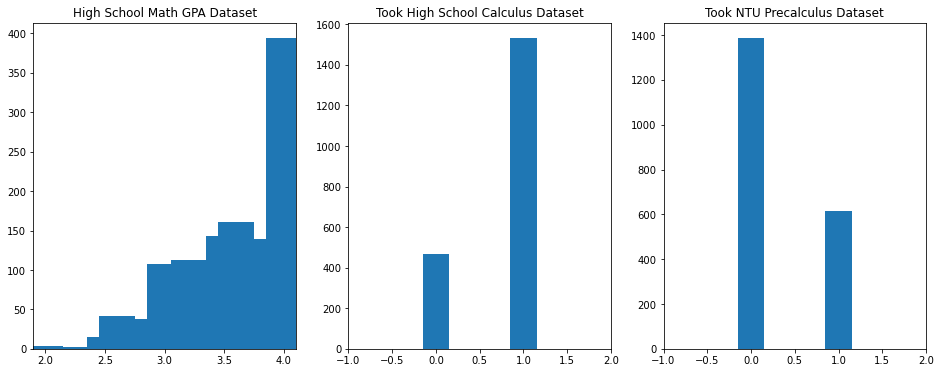

In [4]:
fig = plt.figure(figsize=FIGSIZE)
ax1, ax2, ax3 = [ fig.add_subplot(1, 3, i) for i in range(1, 4) ]


X1 = [ s * .1 for s in range(0, 41) ]
Y1 = [ indep_hs_math_GPA.count(s * .1) for s in range(0, 41) ]

X2 = [ 0, 1 ]
Y2 = [ indep_took_hs_calc.count(0), indep_took_hs_calc.count(1) ]

X3 = [ 0, 1 ]
Y3 = [ indep_took_precalc.count(0), indep_took_precalc.count(1) ]

ax1.bar(X1, Y1, width=.3)
ax2.bar(X2, Y2, width=.3)
ax3.bar(X3, Y3, width=.3)

ax1.set_xlim(1.9, 4.1)
ax2.set_xlim(-1, 2)
ax3.set_xlim(-1, 2)

ax1.set_title('High School Math GPA Dataset')
ax2.set_title('Took High School Calculus Dataset')
ax3.set_title('Took NTU Precalculus Dataset')

plt.show()

$\text{We then make the dataset of the dependent variable with the three independent variales.}$

$\text{The formula for the independent variable is}$

$$\text{NTU_calc_GPA}=0.3+0.7\text{HS_math_GPA}+0.3\text{HS_calc}+0.1\text{NTU_precalc}+\varepsilon$$

$\text{where }\varepsilon=\text{Normal}(\text{mean}=0, \text{Standard Deviation}=0.5)$

In [5]:
dep_NTU_calc_GPA: list[float] = make_data_NTU_calc_GPA(indep_hs_math_GPA, indep_took_hs_calc, indep_took_precalc)

$\text{Showcase the dataset we've generated above.}$

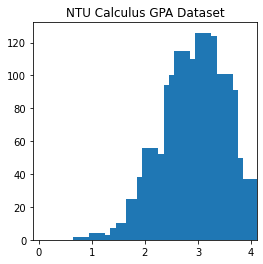

In [6]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1, 1, 1)
X = [ s * .1 for s in range(0, 41) ]
Y = [ dep_NTU_calc_GPA.count(s * .1) for s in range(0, 41) ]
ax.bar(X, Y, width=.3)
ax.set_xlim(-.1, 4.1)
ax.set_title('NTU Calculus GPA Dataset')
plt.show()

![](https://i.imgur.com/z0EXWZb.png)

$\text{Before we use the linear model to fit the data, let's take a peek at the correlations bewteen the independent variables and the dependent variable.}$

In [7]:
calc_dict = {
    'NTU_Calculus_GPA':          dep_NTU_calc_GPA,
    'High_School_Math_GPA':      indep_hs_math_GPA,
    'Took_High_School_Calculus': indep_took_hs_calc,
    'Took_NTU_Precalculus':      indep_took_precalc,
}

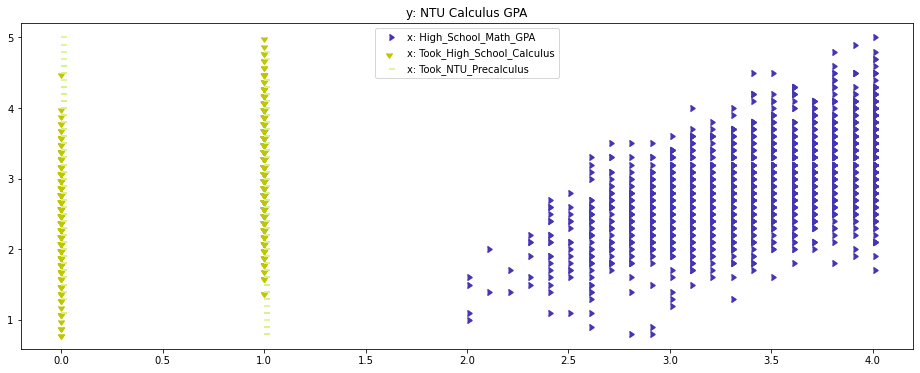

In [8]:
fig = plt.figure(figsize=FIGSIZE)
ax1 = fig.add_subplot(1, 1, 1)

for k, v in calc_dict.items():
    if k == 'NTU_Calculus_GPA': continue
    ax1.scatter(v, calc_dict['NTU_Calculus_GPA'], marker=random.randrange(0, 12), c=generate_random_rgb_color(), label=f'x: {k}')

ax1.set_title('y: NTU Calculus GPA')
plt.legend(loc='upper center')
plt.show()

$\text{Now, we want to find the best fit line of the 3 pairs of variables.}$

$\text{So, I use polyfit from NumPy which allows you to fit a pair of variables with given degree.}$

$\text{Since we are trying to fit the data linearly, so we of course designate the degree to be 1.}$

In [9]:
regressions = { k: np.polyfit(v, calc_dict['NTU_Calculus_GPA'], deg=1) for k, v in calc_dict.items() }
regressions

{'NTU_Calculus_GPA': array([1.00000000e+00, 6.35528743e-16]),
 'High_School_Math_GPA': array([0.84229537, 0.05101571]),
 'Took_High_School_Calculus': array([0.67221385, 2.46303419]),
 'Took_NTU_Precalculus': array([-0.24785148,  3.0540404 ])}

$\text{The returned np.array }A\text{ has the following meaning}$

$$
A[i]=\left\{
    \begin{matrix}
        \text{Slope of the best fit line} & \text{ if } & i=0 \\
        \text{y-intercept of the best fit line} & \text{ if } & i=1
    \end{matrix}
\right.
$$

$\text{Though we obtained the results correctly, we only have a vague idea of it.}$

$\text{Why not plot them on the graph as well?}$

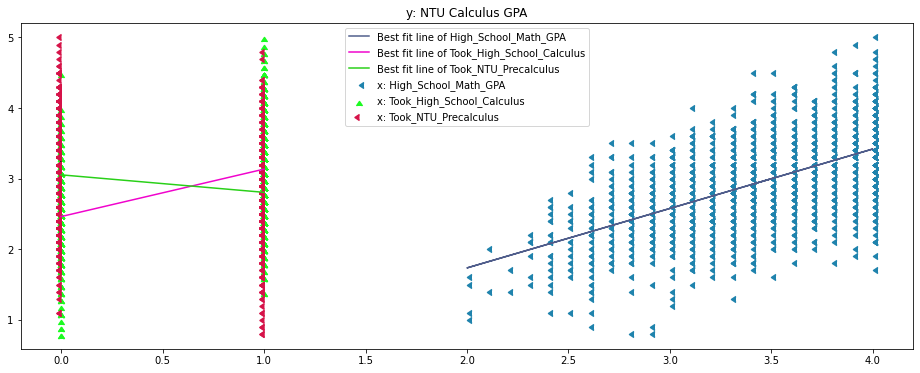

In [10]:
fig = plt.figure(figsize=FIGSIZE)
ax1 = fig.add_subplot(1, 1, 1)

for k, v in calc_dict.items():
    if k == 'NTU_Calculus_GPA': continue
    ax1.scatter(
        v, calc_dict['NTU_Calculus_GPA'], 
        marker=random.randrange(0, 12), 
        c=generate_random_rgb_color(), 
        label=f'x: {k}'
    )
    ax1.plot(
         v, np.polyval(regressions[k], v), 
         c=generate_random_rgb_color(), 
         label=f'Best fit line of {k}'
    )

ax1.set_title('y: NTU Calculus GPA')
plt.legend(loc='upper center')
plt.show()

$\text{Observations:}$

$\text{Interestingly, there exist a negative corelation between the Took_NTU_Precalculus and the NTU_Calculus_GPA.}$

$\text{At the first glance, I thought the test dataset was erroneous or there was something off in my code.}$

$\text{However, after a good thought and a deeper look into the testing data generating formula, it turned out that it actually makes a lot of sense!}$

$\text{Here's why:}$

$\text{In the formula}$

$$\text{NTU_calc_GPA}=0.3+0.7\text{HS_math_GPA}+0.3\text{HS_calc}+0.1\text{NTU_precalc}+\varepsilon$$

$\text{The coefficient (weight) of the NTU_precalc is }0.1.$

$\text{Seemingly causing them postively correlated.}$

$\text{However, when generating the dataset,}$
$\text{there is much higher chance for students who either}$
$\text{hadn't took calculus in high school, had bad math GPA in high school or both to take the precalculus in NTU.}$

$\text{More specifically, the following chart illustrates the relation between}$
$\text{the students' stats and the probability of taking the precalculus course in NTU.}$

| $$\text{Stats}$$      | $\text{Took_HS_calc}=0$ | $\text{Took_HS_calc}=1$ |
| -------- | -------- | -------- |
| $\text{HS_math_GPA}>3$     | $$0.4$$     | $$0.2$$    |
| $\text{HS_math_GPA}\le3$   | $$0.8$$     | $$0.4$$    |

$\text{Therefore, students who take the precalculus course in NTU has a much higher chance of having relatively low stats}$

$\text{That is, although taking the precalculus has positive effect on their Calculus GPA in NTU,}$
$\text{but students who took the course were far behind those who didn't.}$

$\text{In short, the course is not effective enough to make students get better GPA than those who didn't take the course.}$

$\text{It's quite interseting to know,}$

$\text{not every variable in the formula that has a positive coefficient has positive correlation with the dependent variable.}$

$\text{So, we should be more aware of the possibility of such happening so that we don't make errorneous analysis or judgement on the data.}$

$\text{Now let's try to fit the data with a linear model with the formula that follows}$

$$\text{NTU Calculus GPA }\sim\text{High School Math GPA}+\text{Took High School Calculus}+\text{Took NTU Precalculus}$$

In [11]:
model_formula = ' + '.join(calc_dict.keys()).replace('+', '~', 1)

model_formula

'NTU_Calculus_GPA ~ High_School_Math_GPA + Took_High_School_Calculus + Took_NTU_Precalculus'

$\text{We prepare a dataframe for the model to fit.}$

In [12]:
calc_df = pd.DataFrame(calc_dict, index=range(1, N+1))

calc_df

,NTU_Calculus_GPA,High_School_Math_GPA,Took_High_School_Calculus,Took_NTU_Precalculus
1,2.5,3.4,0,0
2,3.5,4.0,1,1
3,4.4,3.8,1,0
4,3.9,4.0,1,0
5,3.3,3.2,1,0
...,...,...,...,...
1996,2.5,2.6,0,1
1997,2.6,3.0,0,1
1998,3.5,3.8,1,0
1999,3.9,3.5,1,0


In [13]:
result = sm.ols(formula=model_formula, data=calc_df).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       NTU_Calculus_GPA   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     388.8
Date:                Wed, 27 Apr 2022   Prob (F-statistic):          7.33e-199
Time:                        02:29:56   Log-Likelihood:                -1449.3
No. Observations:                2000   AIC:                             2907.
Df Residuals:                    1996   BIC:                             2929.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.2487      0.101      2.453      0.014       0.050       0.448
High_School_Math_GPA          0.7062      0.031     22.768      0.000       0.645       0.767
Took_High_School_Calculus     0.3213      0.033      9.823      0.000       0.257       0.385
Took_NTU_Precalculus          0.0946      0.027      3.528      0.000       0.042       0.147
==============================================================================
Omnibus:                        0.800   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.715
Skew:                          -0.004   Prob(JB):                        0.699
Kurtosis:                       3.092   Cond. No.                         35.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\text{We can extract the parameters of the fitted formula with }$ `result.params`

In [14]:
result.params

Intercept                    0.248724
High_School_Math_GPA         0.706213
Took_High_School_Calculus    0.321336
Took_NTU_Precalculus         0.094554
dtype: float64

In [15]:
def lm_predict(A: np.array) -> np.array:
    return A.dot(np.array(result.params))

$\text{Now, let's set up the matrix }\mathbf X$

$\text{The designed matrix }\mathbf X\text{ is defined as follows}$

$$
\mathbf{X}= 
\left[ 
    \begin{array}{ccccc} 
        1 & x_{11} & x_{12} & \ldots & x_{1p} \\ 
        1 & x_{21} & x_{22} & \ldots & x_{2p} \\ 
        1 & x_{31} & x_{32} & \ldots & x_{3p} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\ 
        1 & x_{n1} & x_{n2} & \ldots & x_{np} 
    \end{array} 
\right]
$$

$\text{where, in our case, }n=2000\text{ and }p=3\text{ since we have three sets of independent variables with size of }2000.$

In [16]:
first_col = np.ones(2000)
X = np.c_[first_col, indep_hs_math_GPA, indep_took_hs_calc, indep_took_precalc]
X = np.matrix(X)

X

matrix([[1. , 3.4, 0. , 0. ],
        [1. , 4. , 1. , 1. ],
        [1. , 3.8, 1. , 0. ],
        ...,
        [1. , 3.8, 1. , 0. ],
        [1. , 3.5, 1. , 0. ],
        [1. , 3.5, 1. , 1. ]])

$\text{Now set up the vector }\mathbf y$

$\text{Vector }\mathbf y\text{ is defined as follows}$

$$
\mathbf{y}= 
\left[ 
    \begin{array}{ccccc} 
        y_1  \\ 
        y_2  \\ 
        y_3  \\
        \vdots \\ 
        y_n
    \end{array} 
\right]
$$

$\text{where, in our case, }n=2000$

In [17]:
y = np.c_[dep_NTU_calc_GPA]
y = np.matrix(y)

y

matrix([[2.5],
        [3.5],
        [4.4],
        ...,
        [3.5],
        [3.9],
        [3. ]])

![](https://i.imgur.com/lZgT1vq.png)

$\text{Let }$

$$\mathbf C=\mathbf X^{\text T}\mathbf X$$

In [18]:
C = X.T.dot(X)

C

matrix([[ 2000.  ,  6949.9 ,  1532.  ,   614.  ],
        [ 6949.9 , 24527.27,  5522.8 ,  1998.9 ],
        [ 1532.  ,  5522.8 ,  1532.  ,   313.  ],
        [  614.  ,  1998.9 ,   313.  ,   614.  ]])

$\text{Find }\mathbf C^{-1}\text{ with }$ `np.linalg.inv`

In [19]:
C_inv_with_np = np.linalg.inv(C)

C_inv_with_np

matrix([[ 0.04112435, -0.01206715,  0.0030731 , -0.00340587],
        [-0.01206715,  0.00384951, -0.00191458,  0.00051091],
        [ 0.0030731 , -0.00191458,  0.00428202,  0.00097704],
        [-0.00340587,  0.00051091,  0.00097704,  0.00287318]])

$\text{Let adj}(\mathbf C)\text{ the adjoint matrix of }\mathbf C$

$\text{To obtain adj}(\mathbf C)\text{, we can simply call matrix.H in NumPy.}$

In [20]:
adj_C = make_adjoint_matrix(C)

adj_C

matrix([[ 2.73028652e+09, -8.01150003e+08,  2.04025876e+08,
         -2.26119353e+08],
        [-8.01150002e+08,  2.55573040e+08, -1.27110925e+08,
          3.39199860e+07],
        [ 2.04025876e+08, -1.27110925e+08,  2.84287388e+08,
          6.48667555e+07],
        [-2.26119353e+08,  3.39199860e+07,  6.48667555e+07,
          1.90752974e+08]])

$\text{To obtain the inverse matrix of }\mathbf C, \mathbf C^{-1}$

$\text{We can use the formula for inverse matrix, which is defined as follows}$

$$\mathbf C^{-1}={1\over \det\mathbf C}\cdot\text{adj}(\mathbf C)$$

In [21]:
det_C = np.linalg.det(C)
C_inv = (1/det_C) * adj_C

C_inv

matrix([[ 0.04112435, -0.01206715,  0.0030731 , -0.00340587],
        [-0.01206715,  0.00384951, -0.00191458,  0.00051091],
        [ 0.0030731 , -0.00191458,  0.00428202,  0.00097704],
        [-0.00340587,  0.00051091,  0.00097704,  0.00287318]])

![](https://i.imgur.com/FLk92kJ.png)

$$\hat\beta=(\mathbf X^{\text T}\mathbf X)^{-1}\mathbf X^\text T\mathbf y$$

In [22]:
beta_hat = C_inv.dot(X.T).dot(y)

beta_hat

matrix([[0.24872428],
        [0.7062127 ],
        [0.32133639],
        [0.09455445]])

$$
\hat \beta[i]=
\left\{
    \begin{matrix}
        \text{the y-intercept of the fitted line} & \text{ if } & i = 0 \\
        \text{the coefficient of the }i\text{-th term in the formula} & \text{ if } & i > 0
    \end{matrix}
\right.
$$

$\text{Based on the parameters we obtained above, we can define a best fit function for predictions.}$

In [23]:
def manual_predict(A: np.array) -> np.array:
    return A.dot(beta_hat)

$\text{Residual is defined as follows}$

$$r_i=y_i-\hat{y_i}$$

$\text{We can calculate the residuals by subtracting predicted values from the real values.}$

In [24]:
residuals = y - manual_predict(X)

residuals

matrix([[-0.14984747],
        [ 0.01053407],
        [ 1.14633106],
        ...,
        [ 0.24633106],
        [ 0.85819487],
        [-0.13635958]])

$\text{Now, we calculate the residual variances, where a residual variance }{\hat\sigma^2}_i\text{ is defined as}$

$${\hat\sigma^2}_i=\sum\limits_{k=1}^n{(\bar r_i-r_k)^2\over n}$$

$\text{where }\bar r\text{ is the mean of }\{r_i\}_{i=1}^n$

$\text{Let's calculate the means }\{\bar r_i\}_{i=1}^3\text{ first.}$

In [25]:
residual_means = np.mean(residuals)
# r bar

residual_means

-7.059242079776595e-13

$\text{Now we can calculate the variance of the residuals with the above results.}$

In [26]:
residual_variance = np.var(residuals)

residual_variance

0.24943428221650002

$\text{We estimate the variance of the residual noise }\hat\sigma^2\text{ (mean squared error) as}$

$$\hat{\sigma}^2 = \frac{(\mathbf{y} - \mathbf{X} \cdot \hat{\mathbf{\beta}})^T \cdot (\mathbf{y} - \mathbf{X} \cdot \hat{\mathbf{\beta}})}{n - p - 1}$$

$\text{where }n=2000\text{ and }p=3\text{ in our case.}$

In [27]:
mean_squared_error = (residuals).T.dot(residuals) / (N-2)
mean_squared_error = float(mean_squared_error[0][0])

mean_squared_error

0.24968396618268265

$\text{We get estimated covariances for linear regression coefficient estimates using the following formula}$

$$\widehat{\text{Var}}(\hat{\mathbf{\beta}}) = \hat{\sigma}^2  \left(\mathbf{X}^T \cdot \mathbf{X} \right)^{-1}$$

In [28]:
cov_beta_hat = mean_squared_error * C_inv

cov_beta_hat

matrix([[ 0.01026809, -0.00301297,  0.0007673 , -0.00085039],
        [-0.00301297,  0.00096116, -0.00047804,  0.00012757],
        [ 0.0007673 , -0.00047804,  0.00106915,  0.00024395],
        [-0.00085039,  0.00012757,  0.00024395,  0.00071739]])

$\text{We then take the square root of the diagonal of }\widehat{\text{Var}(\hat\beta)}\text{ to get the standard errors for each coefficient.}$

In [29]:
standard_errors = np.sqrt(cov_beta_hat.diagonal()).getA()[0, :]

standard_errors

array([0.10133159, 0.03100261, 0.03269787, 0.02678406])

![](https://i.imgur.com/YzXtaOL.png)


$\text{Prepare the three columns.}$

In [30]:
true_params      = np.array([ .3, .7, .3, .1 ])
manual_params    = beta_hat
lm_fitted_params = np.array(result.params)

true_params, manual_params, lm_fitted_params

(array([0.3, 0.7, 0.3, 0.1]),
 matrix([[0.24872428],
         [0.7062127 ],
         [0.32133639],
         [0.09455445]]),
 array([0.24872428, 0.7062127 , 0.32133639, 0.09455445]))

$\text{Create the comparison matrix.}$

In [31]:
comp_coef_df         = pd.DataFrame(np.c_[true_params, manual_params, lm_fitted_params])
comp_coef_df.index   = ['Intercept', *[ k for k in calc_dict if k != 'NTU_Calculus_GPA' ] ]
comp_coef_df.columns = ['Truth', 'Manual', 'lm']

comp_coef_df

,Truth,Manual,lm
Intercept,0.3,0.248724,0.248724
High_School_Math_GPA,0.7,0.706213,0.706213
Took_High_School_Calculus,0.3,0.321336,0.321336
Took_NTU_Precalculus,0.1,0.094554,0.094554


$\text{Observation:}$

$\text{We got the exactly the same results from calling the }$ `lm` $\text{ function and from scratch!}$

![](https://i.imgur.com/lGSzwtC.png)

$\text{Prepare the three columns.}$

In [32]:
true_cov   = (TRUE_SIGMA ** 2) * C_inv

true_stderrs   = np.array(np.sqrt(true_cov.diagonal()).getA()[0, :])
manual_stderrs = np.array(standard_errors)
lm_stderrs     = np.array(result.bse)

true_stderrs, manual_stderrs, lm_stderrs

(array([0.1013957 , 0.03102222, 0.03271856, 0.026801  ]),
 array([0.10133159, 0.03100261, 0.03269787, 0.02678406]),
 array([0.10138234, 0.03101814, 0.03271425, 0.02679747]))

$\text{Create the comparison matrix.}$

In [33]:
comp_stderr_df         = pd.DataFrame( np.c_[true_stderrs, manual_stderrs, lm_stderrs] )
comp_stderr_df.index   = [ 'Intercept', *(list(calc_dict.keys())[1:]) ]
comp_stderr_df.columns = ['Truth', 'Manual', 'lm']

comp_stderr_df

,Truth,Manual,lm
Intercept,0.101396,0.101332,0.101382
High_School_Math_GPA,0.031022,0.031003,0.031018
Took_High_School_Calculus,0.032719,0.032698,0.032714
Took_NTU_Precalculus,0.026801,0.026784,0.026797


$\text{Observation:}$

$\text{We got the almost the same results from calling the }$ `lm` $\text{ function and from scratch!}$

![](https://i.imgur.com/exLW5QJ.png)

$\text{Prepare the three columns.}$

In [34]:
true_resid_var   = TRUE_SIGMA ** 2
manual_resid_var = residual_variance
lm_resid_var     = np.var(result.resid)

true_resid_var, manual_resid_var, lm_resid_var

(0.25, 0.24943428221650002, 0.24943428221650005)

$\text{Create the comparison matrix.}$

In [35]:
comp_resid_var_df         = pd.DataFrame(np.c_[true_resid_var, manual_resid_var, lm_resid_var])

comp_resid_var_df.index   = ['Residual Variance']
comp_resid_var_df.columns = ['Truth', 'Manual', 'lm']

comp_resid_var_df

,Truth,Manual,lm
Residual Variance,0.25,0.249434,0.249434


$\text{Observation:}$

$\text{We got the almost the same results from calling the }$ `lm` $\text{ function and from scratch!}$

![](https://i.imgur.com/s6m1Te3.png)

$\text{First, let's create a matrix representing the stats of the new student.}$

In [36]:
new_student = np.array( [[ 1, 3.123456, 1, 0 ]] )

new_student

array([[1.      , 3.123456, 1.      , 0.      ]])

$\text{Now, let's see the predictions of the manual and lm models on the given new student matrix.}$

In [37]:
manual_predict(new_student), lm_predict(new_student)

(matrix([[2.77588497]]), array([2.77588497]))

$\text{The two models gave the same predictions.}$